In [1]:
import scanpy as sc
import pandas as pd

[Executed on 2023-11-27 14:05:22.758555]


In [9]:
adata=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Dataprocess.h5ad")
adata

[Executed on 2023-11-27 15:45:23.042337]


AnnData object with n_obs × n_vars = 3836 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

In [4]:
readcounts = sc.read_text("/proj/sensoryaging/60_plates_data/Human_data/convert/readcount_inex_all.csv",first_column_names=True,delimiter=",")
adata.layers["read"] = readcounts.X


[Executed on 2023-11-22 12:26:26.109860]


In [6]:
adata.var_names_make_unique()
adata.layers["umi"] = adata.X.copy() # save the UMI counts in a new layer

[Executed on 2023-11-22 12:27:29.091615]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


In [7]:
adata

[Executed on 2023-11-22 12:27:37.680742]


AnnData object with n_obs × n_vars = 3840 × 60220
    layers: 'read', 'umi'

In [11]:
#remove any genes start with rRNA_
adata = adata[:,~adata.var_names.str.startswith('rRNA_')]

[Executed on 2023-11-27 15:46:01.395476]


[Executed on 2023-11-27 15:46:04.092030]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

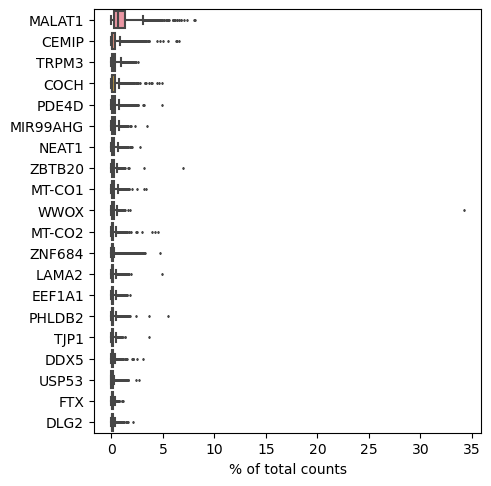

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [13]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

[Executed on 2023-11-27 15:46:39.643245]


In [14]:
adata.X = adata.layers['umi'] # restore the UMI counts before normalization

[Executed on 2023-11-27 15:47:08.469382]


In [15]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, layer='read',inplace=False)

[Executed on 2023-11-27 15:47:11.042935]


(                      n_genes_by_counts  total_counts  total_counts_mt  \
 AACATCGAGGAACTAGCGAT              10780      539234.0            483.0   
 AACATCGAGGAATCAGCGTA              13181      344169.0            869.0   
 AACATCGAGGACAGCCAGAT               6964       35783.0             15.0   
 AACATCGAGGACTGTCGACG              11315      563317.0            467.0   
 AACATCGAGGATCGCTAGAA              13967      274677.0            138.0   
 ...                                 ...           ...              ...   
 TTGTTACTCGTCTAGAAGAG               5428       26915.0            176.0   
 TTGTTACTCGTGCTGATGCG              10291      369704.0            258.0   
 TTGTTACTCGTGTATCTCCT               9979      286568.0            614.0   
 TTGTTACTCGTTCGAGTTGT               6451       63575.0             47.0   
 TTGTTACTCGTTCTAAGCCA               4059       16846.0             39.0   
 
                       pct_counts_mt  
 AACATCGAGGAACTAGCGAT       0.089572  
 AACATCGAGGAATCAGCGT

[Executed on 2023-11-22 12:43:16.481362]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

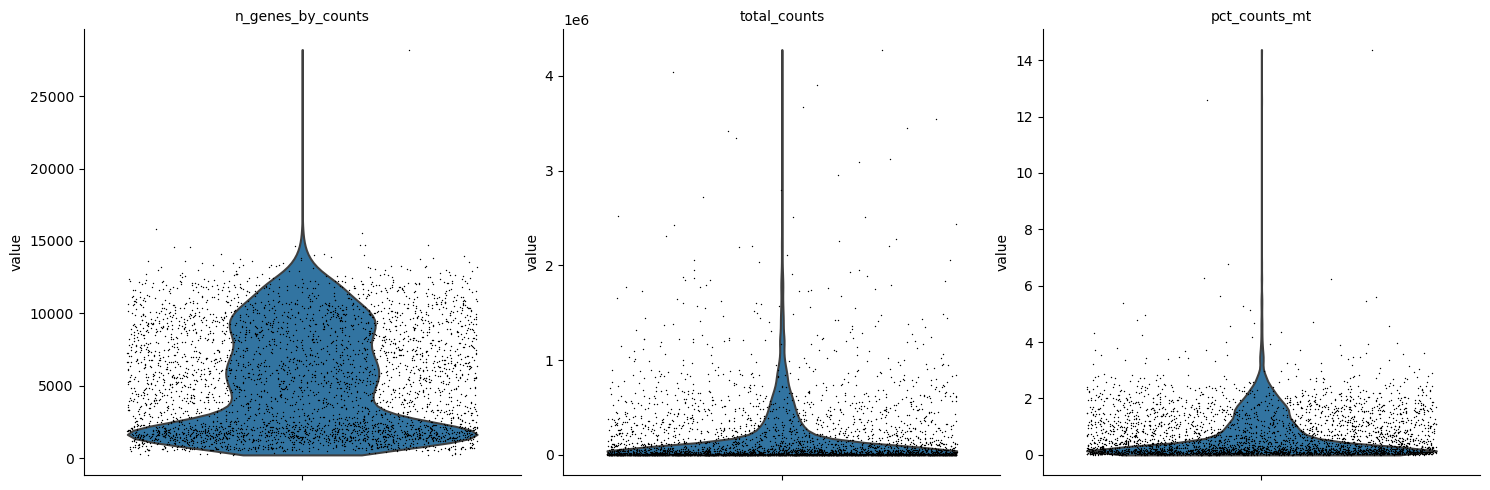

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [16]:
adata.var

[Executed on 2023-11-27 15:47:16.512173]


n_cells     mt  n_cells_by_counts  mean_counts  \
TSPAN6          849  False                849     3.075600   
TNMD            140  False                140     0.188999   
DPM1           1007  False               1007     5.819864   
SCYL3           930  False                930     5.094891   
C1orf112       1328  False               1328     4.824296   
...             ...    ...                ...          ...   
WASIR1-1         11  False                 11     0.007039   
DDX11L16-3       34  False                 34     0.019291   
WASH6P-1        361  False                361     0.727581   
IL9R-1           56  False                 56     0.047967   
GFP              51  False                 51     0.021376   

            pct_dropout_by_counts  total_counts  
TSPAN6                  77.867570       11798.0  
TNMD                    96.350365         725.0  
DPM1                    73.748697       22325.0  
SCYL3                   75.755996       19544.0  
C1orf112                65.380605       18506.0  
...                           ...           ...  
WASIR1-1                99.713243          27.0  
DDX11L16-3              99.113660          74.0  
WASH6P-1                90.589155        2791.0  
IL9R-1                  98.540146         184.0  
GFP                     98.670490          82.0  

[58035 rows x 6 columns]

In [24]:
adata.write_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Dataprocess.h5ad")

[Executed on 2023-11-22 13:17:04.500521]


In [3]:
adata=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Dataprocess.h5ad")
adata

[Executed on 2023-11-24 09:45:57.194444]


AnnData object with n_obs × n_vars = 3836 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

[Executed on 2023-11-27 15:47:20.388536]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

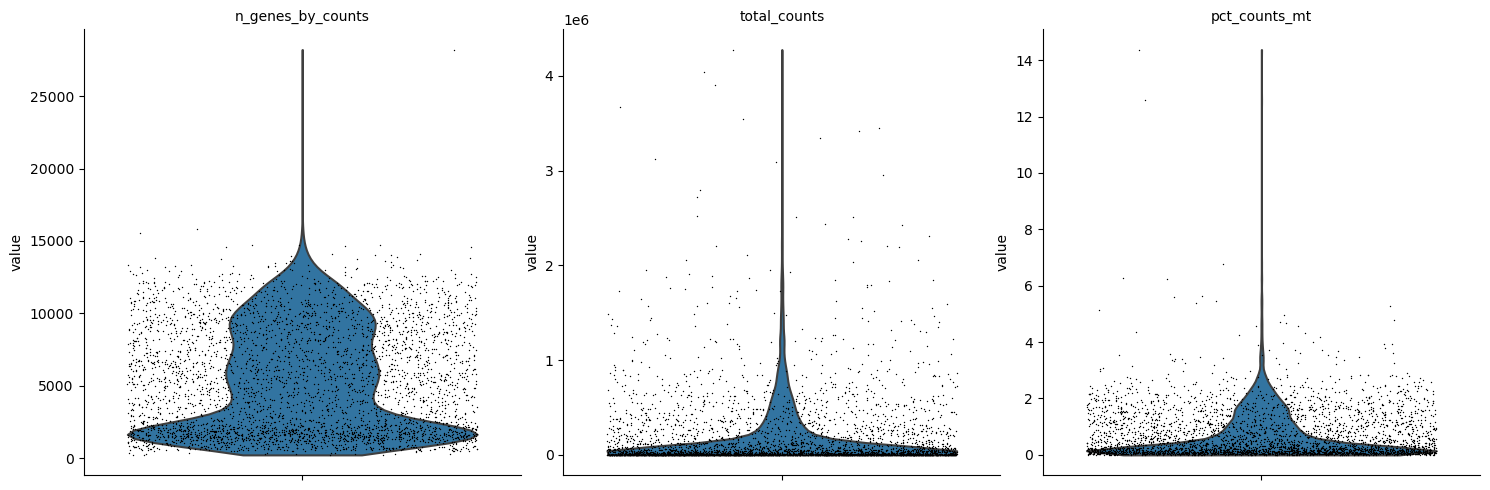

In [17]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

[Executed on 2023-11-27 15:47:25.457012]


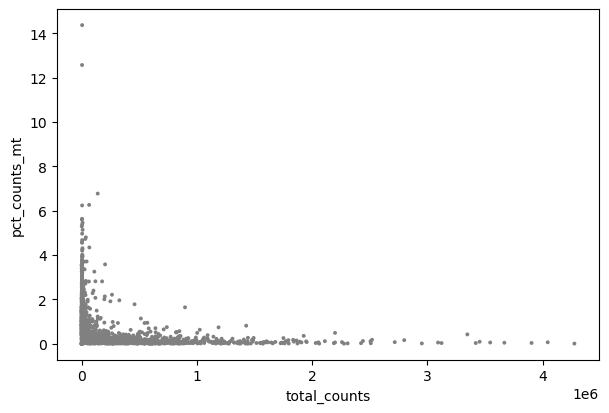

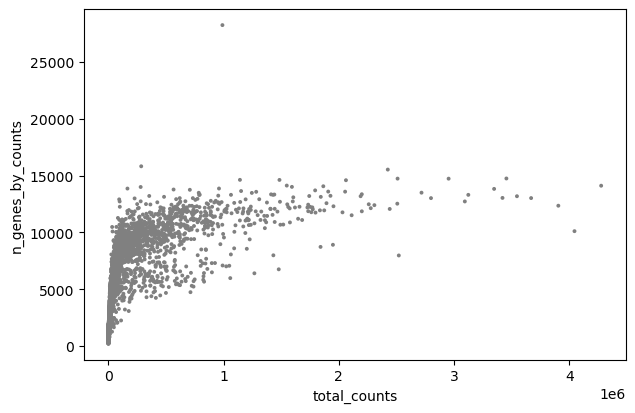

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [6]:
adata

[Executed on 2023-11-24 09:46:05.190273]


AnnData object with n_obs × n_vars = 3836 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

[Executed on 2023-11-27 16:00:34.376907]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

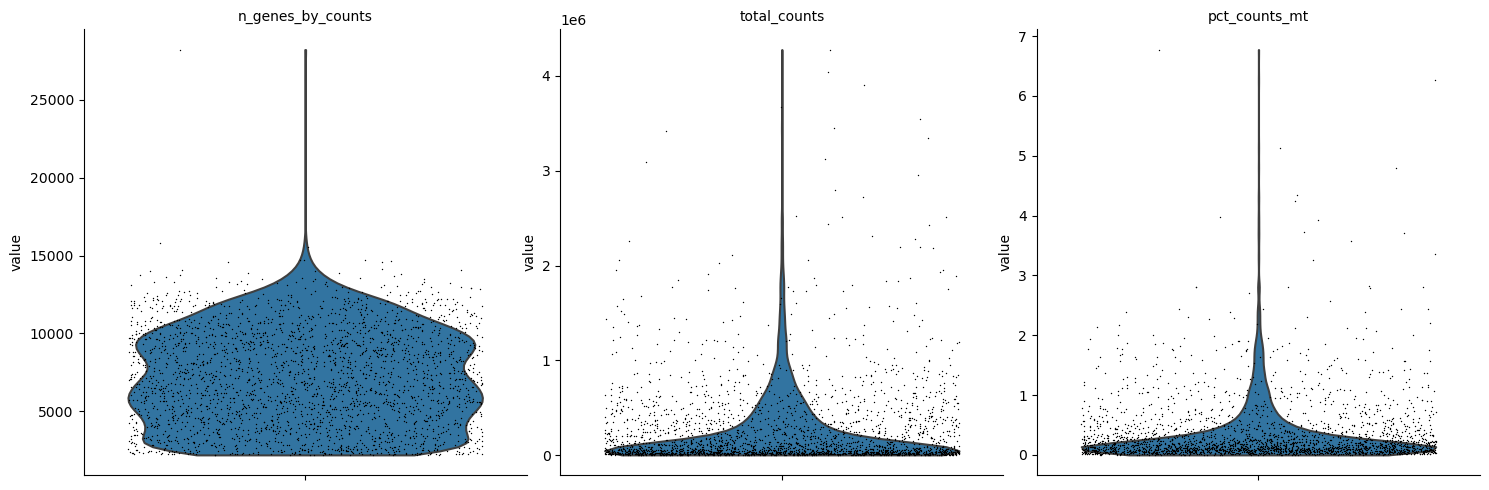

In [36]:
a=adata[adata.obs['n_genes_by_counts'] > 2200, :]
sc.pl.violin(a, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [37]:
a=a[a.obs.pct_counts_mt < 2, :]

[Executed on 2023-11-27 16:00:43.085403]


In [38]:
a

[Executed on 2023-11-27 16:00:44.124020]


View of AnnData object with n_obs × n_vars = 2581 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

[Executed on 2023-11-27 16:00:44.776905]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:148: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


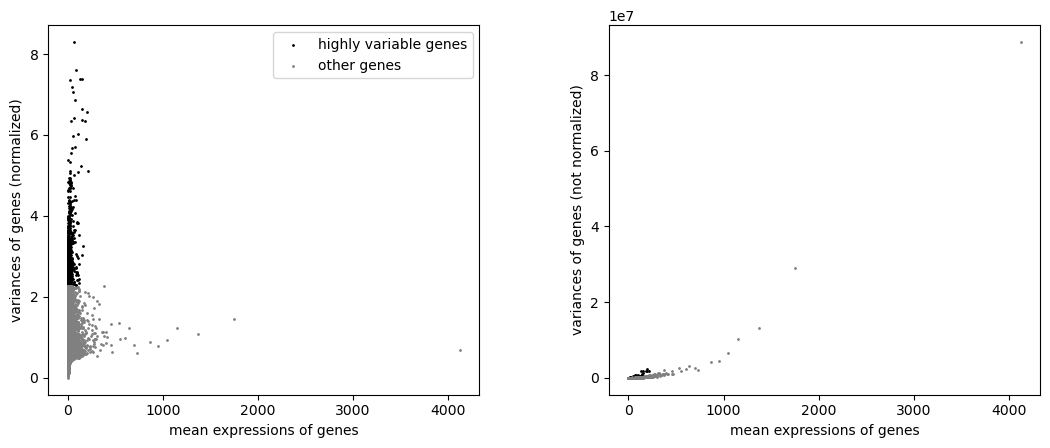

In [39]:
sc.pp.highly_variable_genes(a,n_top_genes=1500, flavor='seurat_v3', layer='umi')
sc.pl.highly_variable_genes(a)

In [40]:
sc.pp.normalize_total(a, target_sum=1e4)
sc.pp.log1p(a)
a.layers['log1p'] = a.X.copy()
sc.pp.scale(a, max_value=10)
a.layers['scale'] = a.X.copy()

[Executed on 2023-11-27 16:01:04.457351]


[Executed on 2023-11-27 16:01:08.300773]


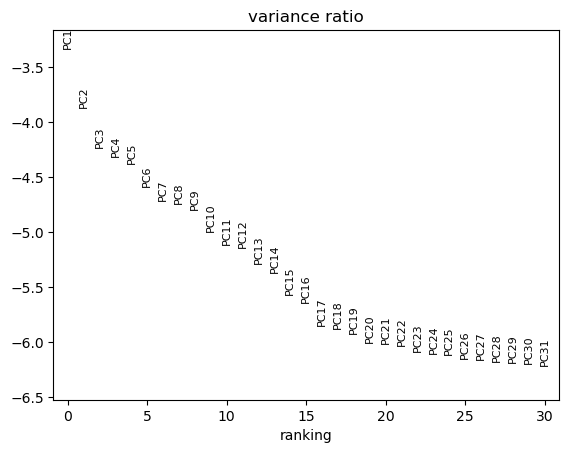

In [41]:
sc.tl.pca(a, svd_solver='arpack')
sc.pl.pca_variance_ratio(a, log=True)

[Executed on 2023-11-27 16:01:21.946892]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


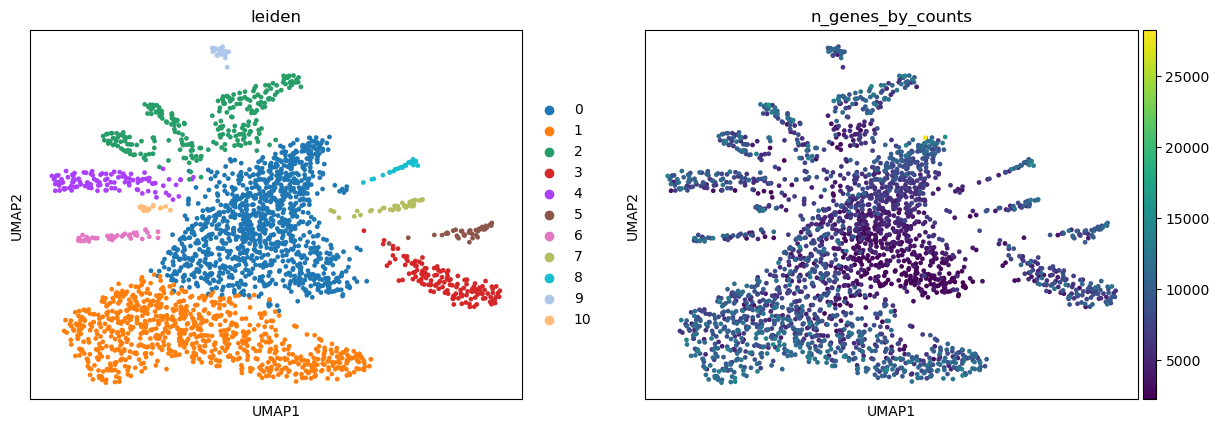

In [42]:
sc.pp.neighbors(a, n_neighbors=50, n_pcs=16)
sc.tl.leiden(a, resolution=0.2)
sc.tl.umap(a, min_dist=0.6, spread=0.77)
sc.pl.umap(a, color=['leiden','n_genes_by_counts'])


In [26]:
adata

[Executed on 2023-11-27 15:49:14.387483]


AnnData object with n_obs × n_vars = 3836 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'read', 'umi'

In [29]:
a.var[a.var['highly_variable']]

[Executed on 2023-11-27 15:50:07.576530]


n_cells     mt  n_cells_by_counts  mean_counts  \
TMEM176A              56  False                 56     0.498697   
ABCB5               1199  False               1199     5.535193   
DVL2                 566  False                566     2.389468   
PRSS22               118  False                118     0.876695   
YBX2                 114  False                114     0.747132   
...                  ...    ...                ...          ...   
ENSG00000290863       69  False                 69     0.565693   
ENSG00000290977       61  False                 61     0.316215   
ENSG00000291003     1373  False               1373    16.460897   
ENSG00000291174      958  False                958    18.539885   
PRSS30P               88  False                 88     0.425443   

                 pct_dropout_by_counts  total_counts  highly_variable  \
TMEM176A                     98.540146        1913.0             True   
ABCB5                        68.743483       21233.0             True   
DVL2                         85.245047        9166.0             True   
PRSS22                       96.923879        3363.0             True   
YBX2                         97.028154        2866.0             True   
...                                ...           ...              ...   
ENSG00000290863              98.201251        2170.0             True   
ENSG00000290977              98.409802        1213.0             True   
ENSG00000291003              64.207508       63144.0             True   
ENSG00000291174              75.026069       71119.0             True   
PRSS30P                      97.705944        1632.0             True   

                 highly_variable_rank      means     variances  \
TMEM176A                        342.0   0.738086    287.203467   
ABCB5                           282.0   8.160790   5787.217935   
DVL2                            816.0   3.480434   1505.518706   
PRSS22                          167.0   1.299884    478.692205   
YBX2                           1399.0   1.109260   1078.644647   
...                               ...        ...           ...   
ENSG00000290863                 489.0   0.839985    158.517408   
ENSG00000290977                1208.0   0.469198     89.565427   
ENSG00000291003                 553.0  24.234018  24572.205292   
ENSG00000291174                  21.0  27.457575  88753.697521   
PRSS30P                        1281.0   0.631151     87.439091   

                 variances_norm      mean       std  
TMEM176A               2.919794  0.009923  0.114877  
ABCB5                  3.007915  0.218622  0.488208  
DVL2                   2.505191  0.063712  0.209033  
PRSS22                 3.391478  0.012646  0.106771  
YBX2                   2.301154  0.011136  0.099639  
...                         ...       ...       ...  
ENSG00000290863        2.728011  0.011959  0.111661  
ENSG00000290977        2.353070  0.007603  0.072419  
ENSG00000291003        2.678336  0.263694  0.470694  
ENSG00000291174        5.344093  0.200403  0.476455  
PRSS30P                2.330107  0.006847  0.058441  

[1500 rows x 13 columns]

[Executed on 2023-11-27 16:12:33.466201]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


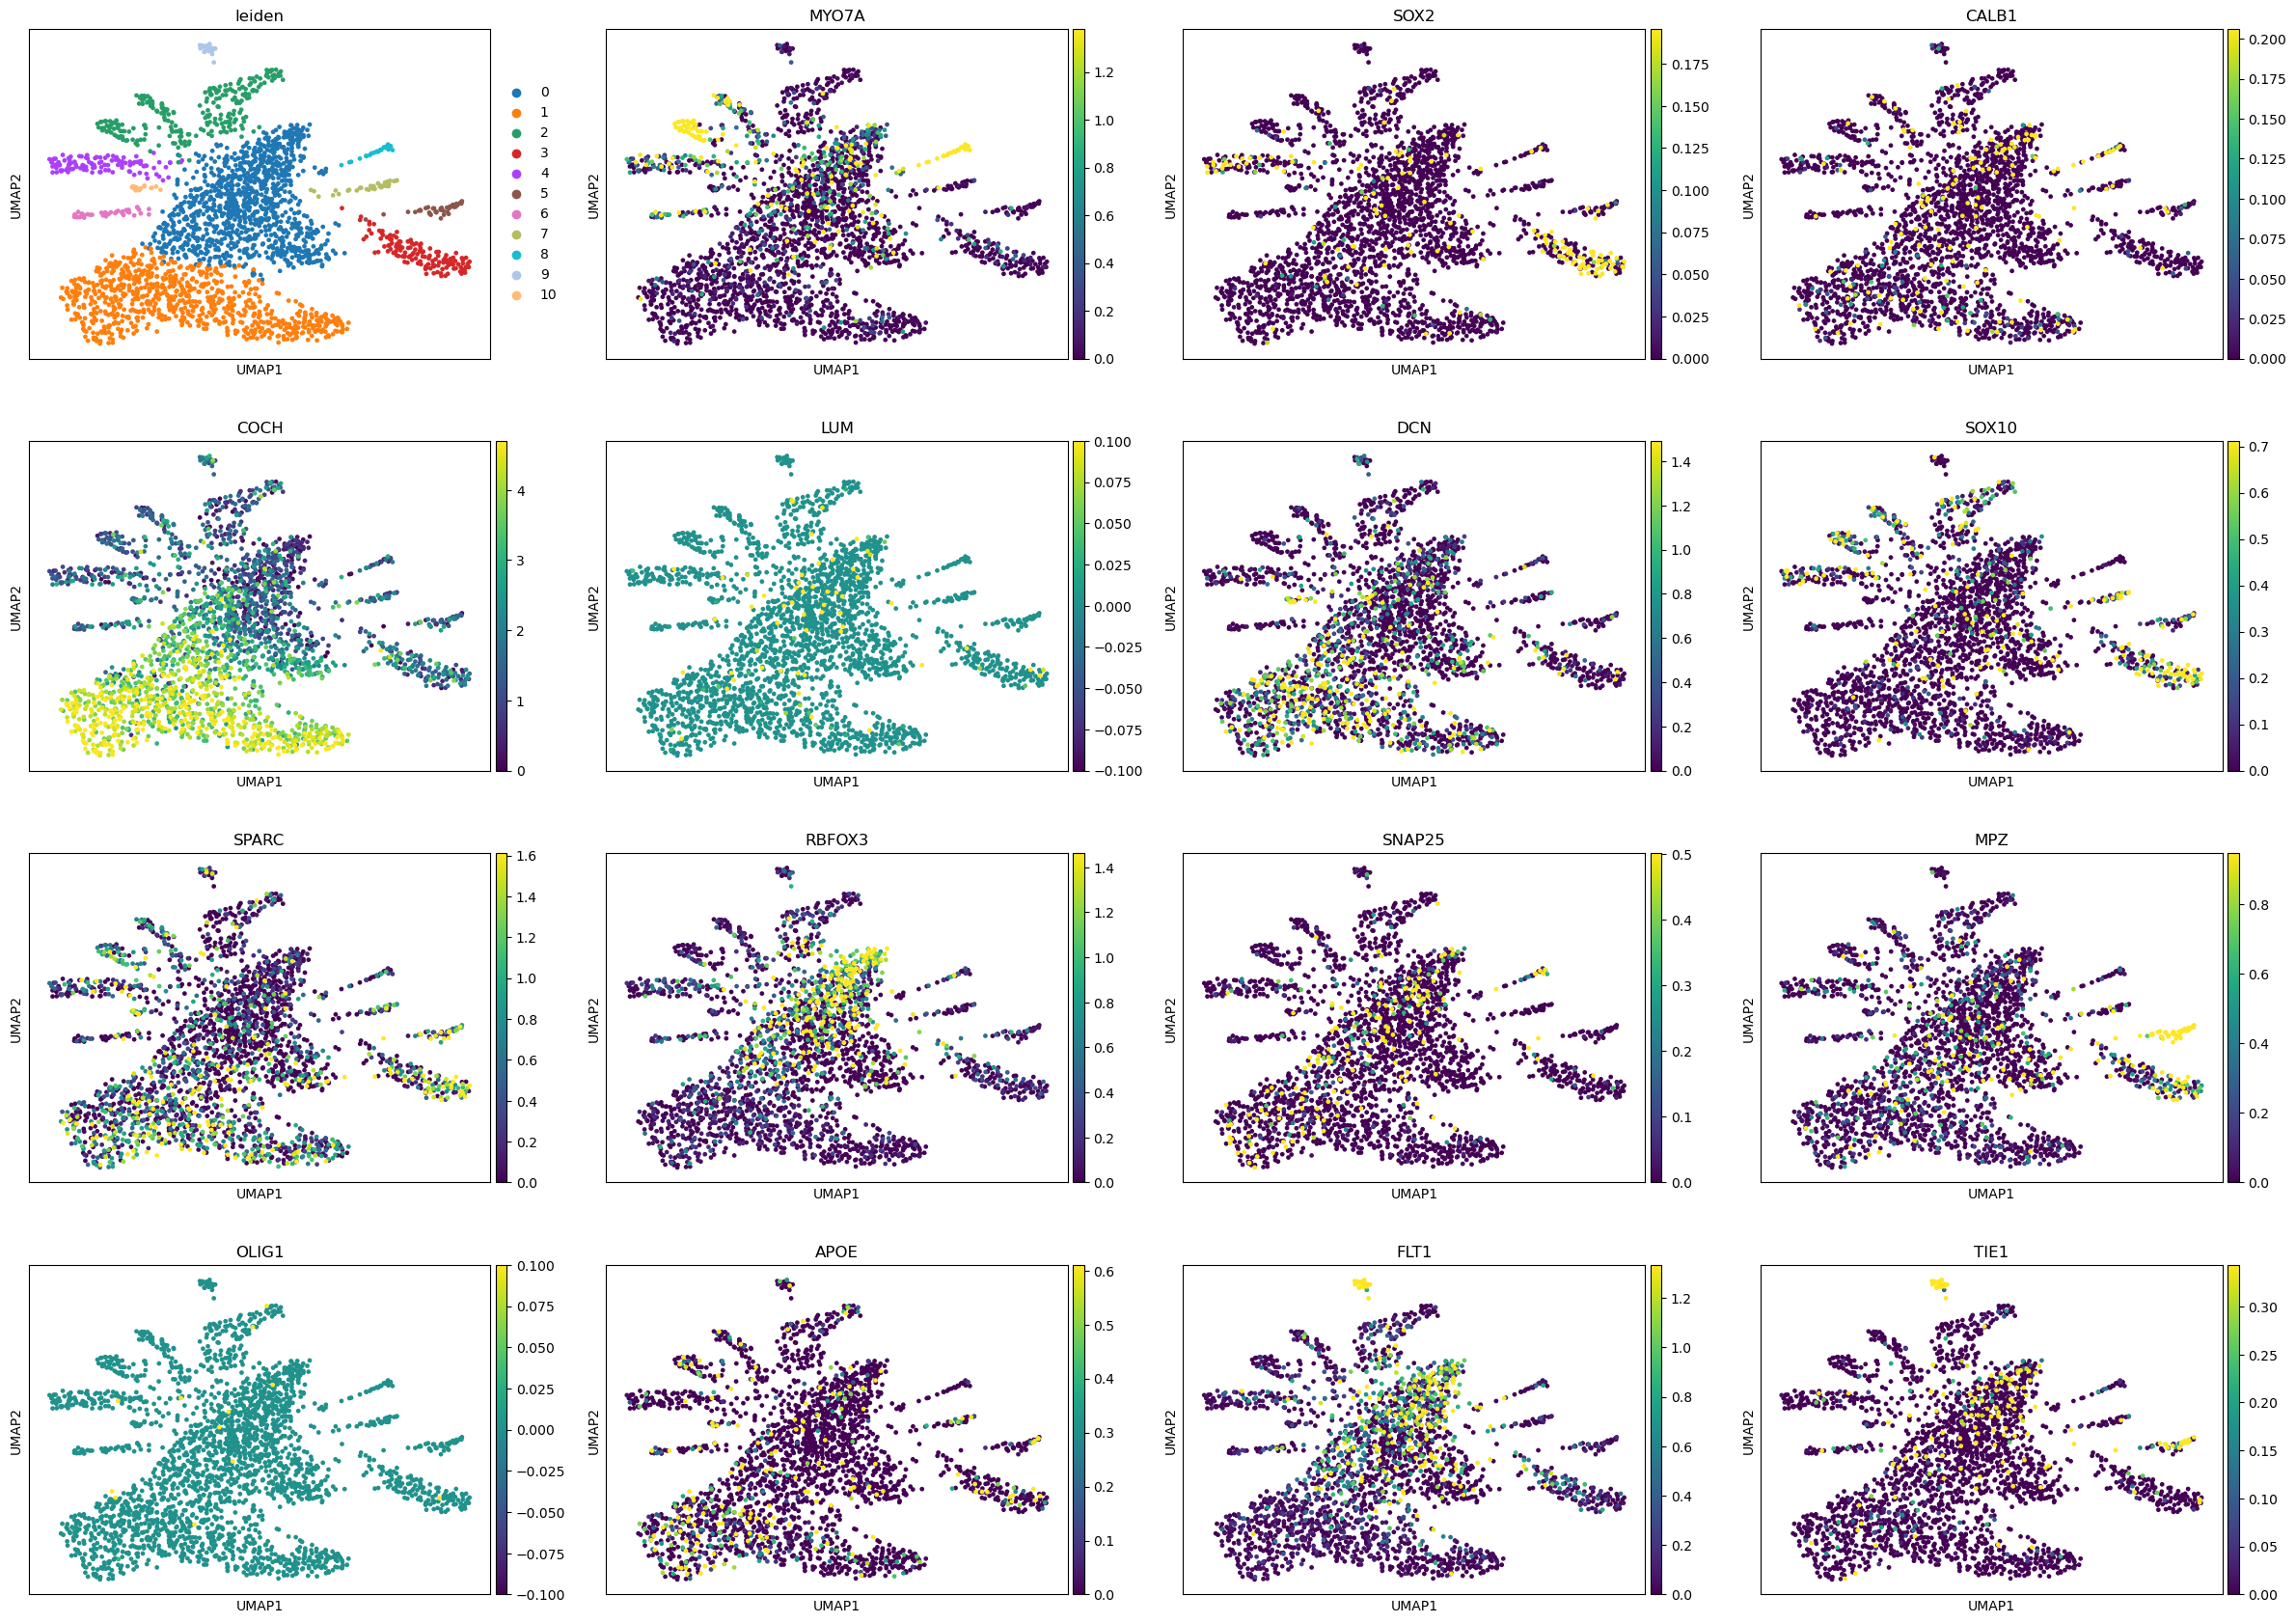

In [66]:
sc.pl.umap(a,color=['leiden','MYO7A','SOX2','CALB1','COCH','LUM','DCN','SOX10','SPARC','RBFOX3','SNAP25','MPZ','OLIG1','APOE','FLT1','TIE1'],layer='log1p',vmax='p95')

[Executed on 2023-11-27 16:01:55.370148]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


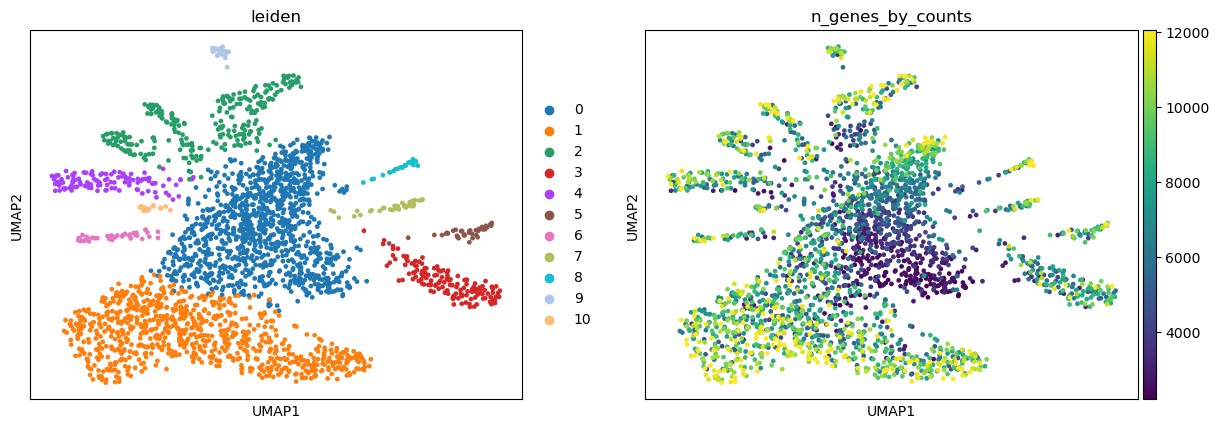

In [43]:
sc.pl.umap(a, color=['leiden','n_genes_by_counts'],vmax='p95')

In [67]:
a.write_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/First_UMAP.h5ad")
#a=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/First_UMAP.h5ad")

[Executed on 2023-11-27 16:28:09.734691]


In [7]:
a

[Executed on 2023-11-27 15:31:26.432441]


AnnData object with n_obs × n_vars = 2581 × 58198
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi'
    obsp: 'connectivities', 'distances'

In [32]:
a.var[a.var.highly_variable]

[Executed on 2023-11-27 15:52:52.477795]


n_cells     mt  n_cells_by_counts  mean_counts  \
TMEM176A              56  False                 56     0.498697   
ABCB5               1199  False               1199     5.535193   
DVL2                 566  False                566     2.389468   
PRSS22               118  False                118     0.876695   
YBX2                 114  False                114     0.747132   
...                  ...    ...                ...          ...   
ENSG00000290863       69  False                 69     0.565693   
ENSG00000290977       61  False                 61     0.316215   
ENSG00000291003     1373  False               1373    16.460897   
ENSG00000291174      958  False                958    18.539885   
PRSS30P               88  False                 88     0.425443   

                 pct_dropout_by_counts  total_counts  highly_variable  \
TMEM176A                     98.540146        1913.0             True   
ABCB5                        68.743483       21233.0             True   
DVL2                         85.245047        9166.0             True   
PRSS22                       96.923879        3363.0             True   
YBX2                         97.028154        2866.0             True   
...                                ...           ...              ...   
ENSG00000290863              98.201251        2170.0             True   
ENSG00000290977              98.409802        1213.0             True   
ENSG00000291003              64.207508       63144.0             True   
ENSG00000291174              75.026069       71119.0             True   
PRSS30P                      97.705944        1632.0             True   

                 highly_variable_rank      means     variances  \
TMEM176A                        342.0   0.738086    287.203467   
ABCB5                           282.0   8.160790   5787.217935   
DVL2                            816.0   3.480434   1505.518706   
PRSS22                          167.0   1.299884    478.692205   
YBX2                           1399.0   1.109260   1078.644647   
...                               ...        ...           ...   
ENSG00000290863                 489.0   0.839985    158.517408   
ENSG00000290977                1208.0   0.469198     89.565427   
ENSG00000291003                 553.0  24.234018  24572.205292   
ENSG00000291174                  21.0  27.457575  88753.697521   
PRSS30P                        1281.0   0.631151     87.439091   

                 variances_norm      mean       std  
TMEM176A               2.919794  0.009923  0.114877  
ABCB5                  3.007915  0.218622  0.488208  
DVL2                   2.505191  0.063712  0.209033  
PRSS22                 3.391478  0.012646  0.106771  
YBX2                   2.301154  0.011136  0.099639  
...                         ...       ...       ...  
ENSG00000290863        2.728011  0.011959  0.111661  
ENSG00000290977        2.353070  0.007603  0.072419  
ENSG00000291003        2.678336  0.263694  0.470694  
ENSG00000291174        5.344093  0.200403  0.476455  
PRSS30P                2.330107  0.006847  0.058441  

[1500 rows x 13 columns]

In [35]:
a.X.min()

[Executed on 2023-11-27 15:59:53.993191]


0.0

In [48]:
subset_1=a[~a.obs['leiden'].isin(['0','1'])].copy()
subset_1

[Executed on 2023-11-27 16:05:10.600730]


AnnData object with n_obs × n_vars = 688 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'read', 'umi', 'log1p', 'scale'
    obsp: 'distances', 'connectivities'

In [49]:
subset_1.X=subset_1.layers['log1p'].copy()

[Executed on 2023-11-27 16:05:49.146879]


In [50]:
sc.pp.filter_genes(subset_1, min_cells=10)


[Executed on 2023-11-27 16:06:06.767171]


[Executed on 2023-11-27 16:06:36.525371]


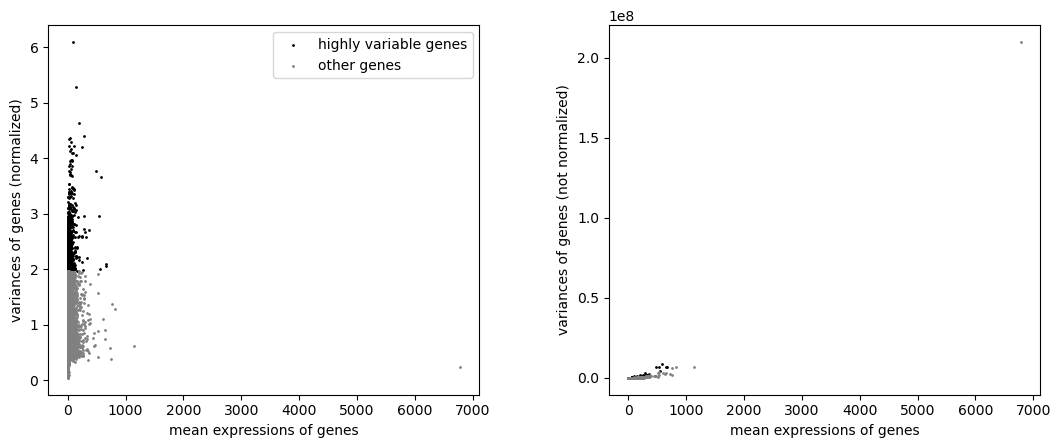

In [51]:
sc.pp.highly_variable_genes(subset_1,n_top_genes=1500, flavor='seurat_v3', layer='umi')
sc.pl.highly_variable_genes(subset_1)

In [52]:
sc.pp.scale(subset_1, max_value=10)
subset_1.layers['scale'] = subset_1.X.copy()

[Executed on 2023-11-27 16:07:13.460754]


[Executed on 2023-11-27 16:07:28.070258]


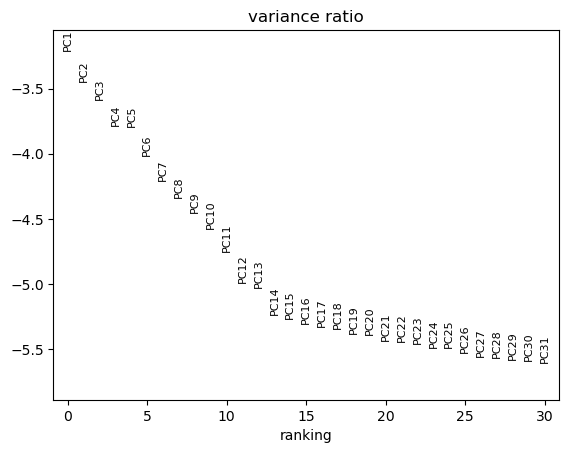

In [53]:
sc.tl.pca(subset_1, svd_solver='arpack')
sc.pl.pca_variance_ratio(subset_1, log=True)

[Executed on 2023-11-27 16:08:15.976472]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


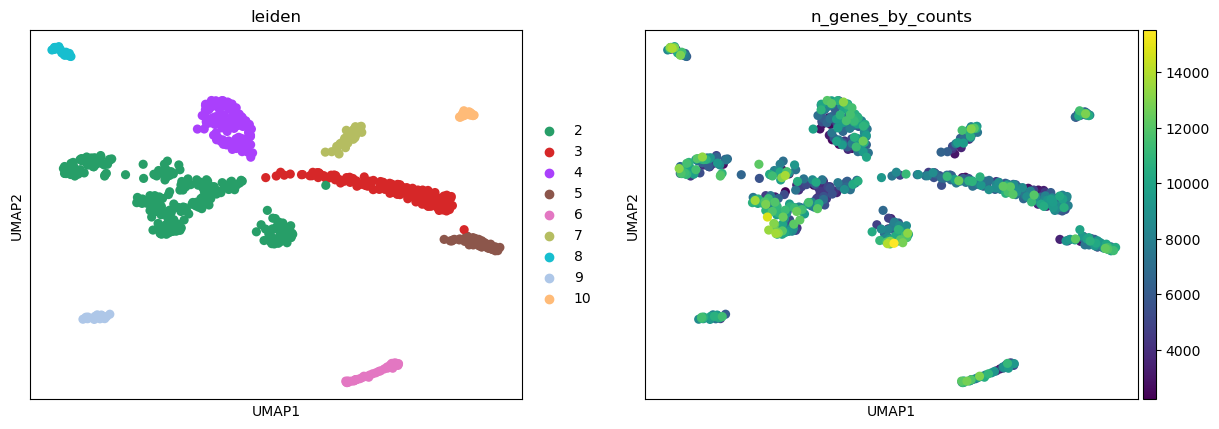

In [54]:
sc.pp.neighbors(subset_1, n_neighbors=30, n_pcs=12)
sc.tl.umap(subset_1, min_dist=0.3, spread=0.77)
sc.pl.umap(subset_1, color=['leiden','n_genes_by_counts'])


[Executed on 2023-11-27 16:08:38.604766]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


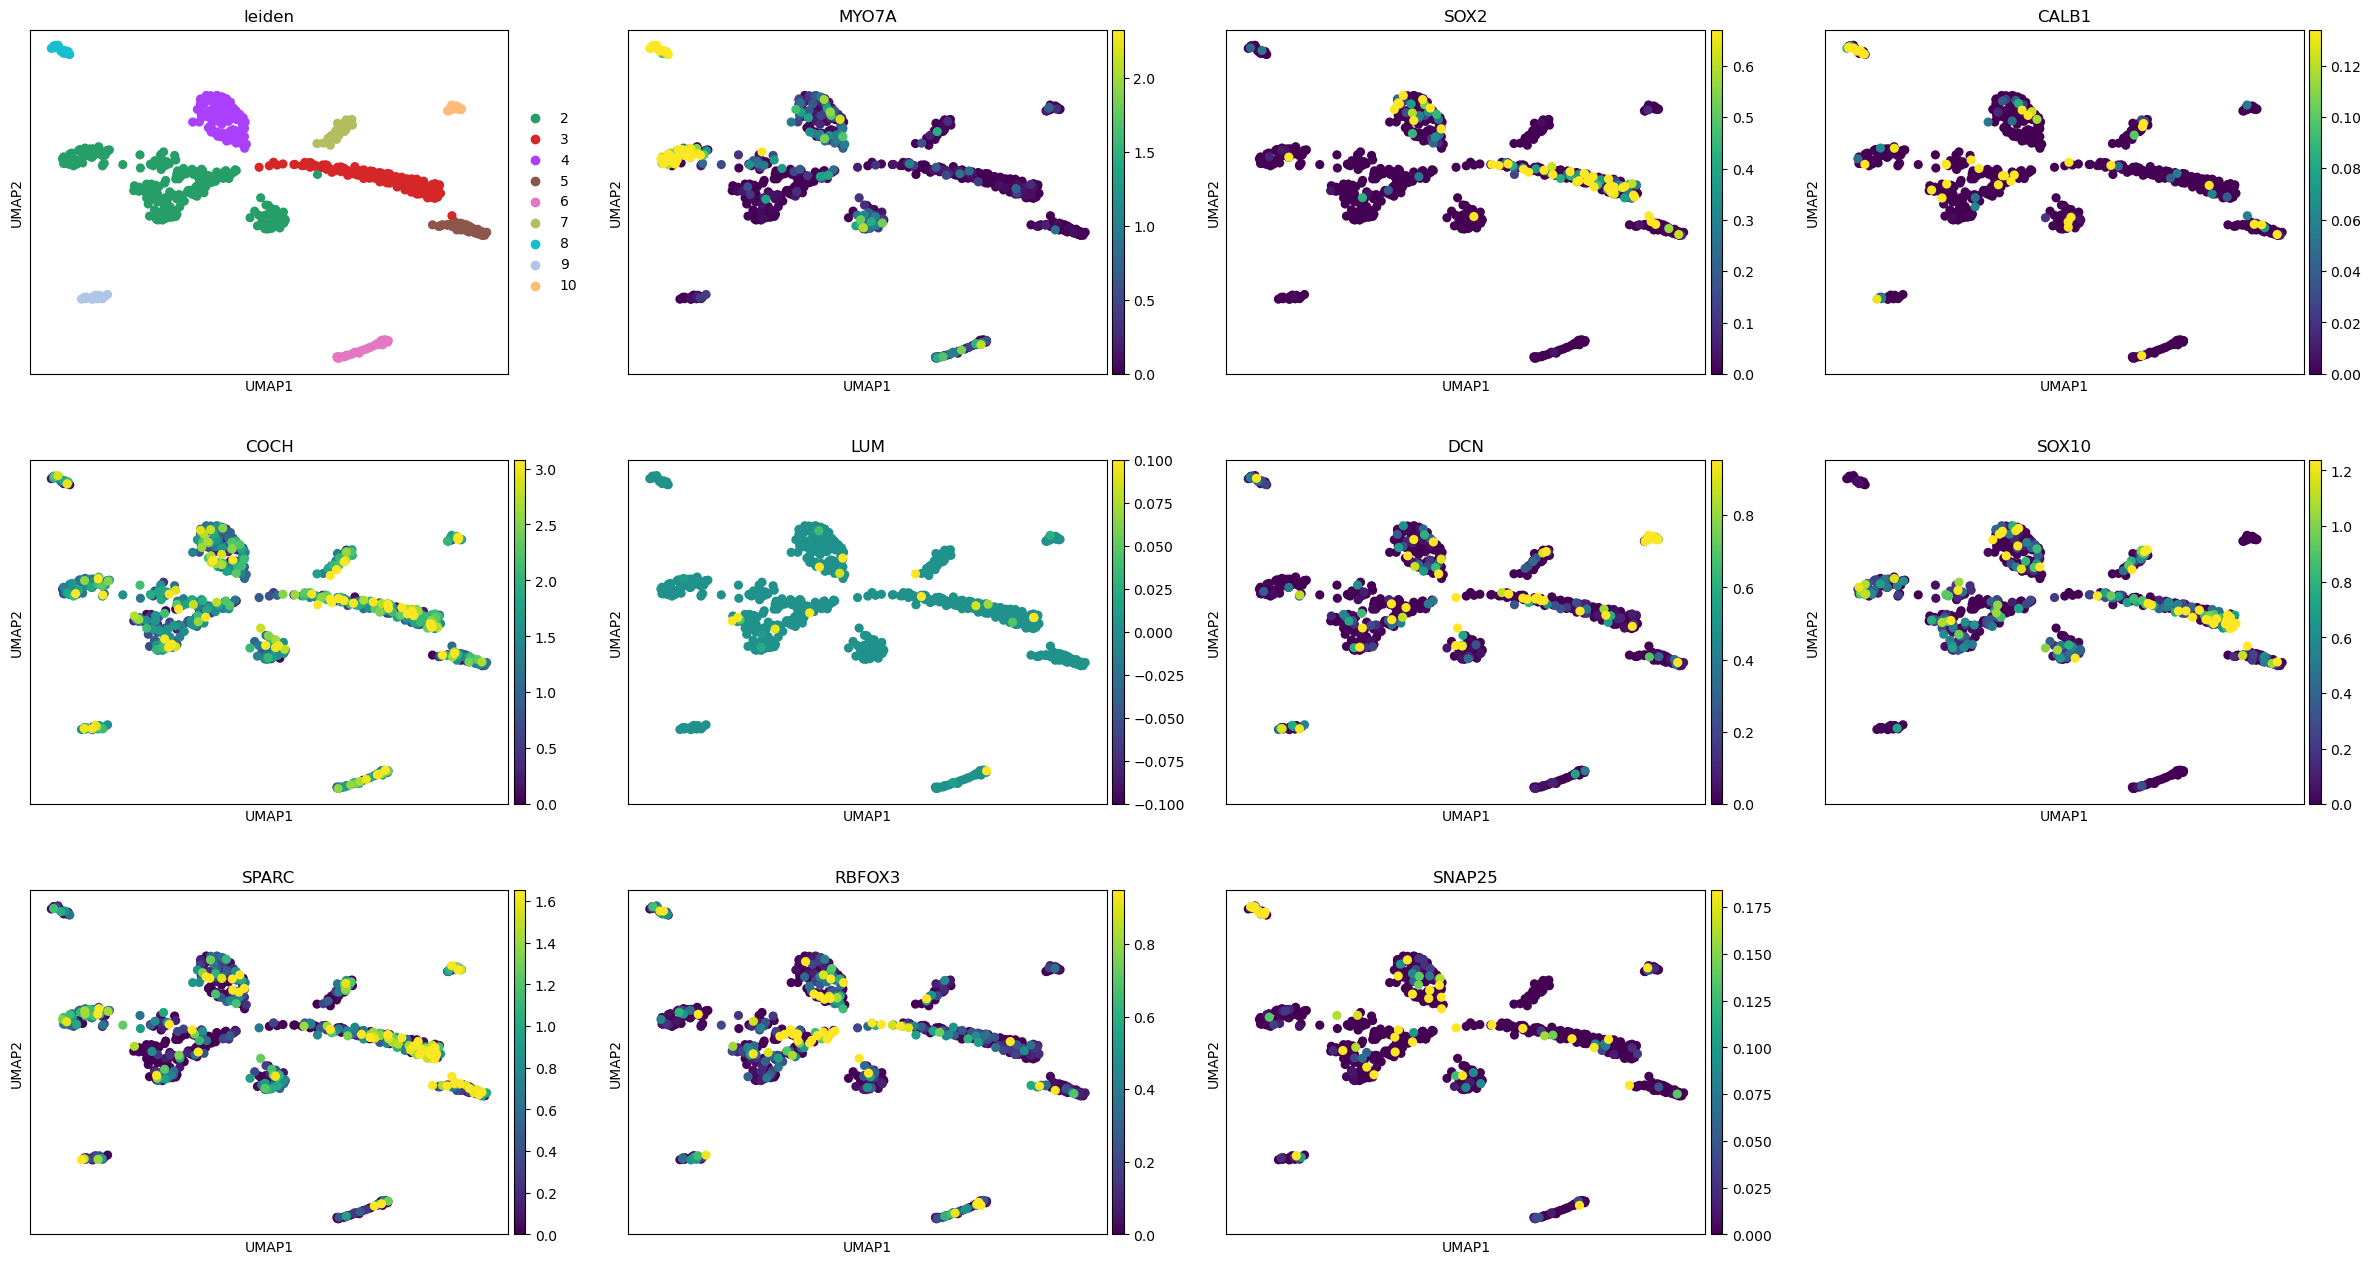

In [55]:
sc.pl.umap(subset_1,color=['leiden','MYO7A','SOX2','CALB1','COCH','LUM','DCN','SOX10','SPARC','RBFOX3','SNAP25'],layer='log1p',vmax='p95')

[Executed on 2023-11-27 16:08:46.732753]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


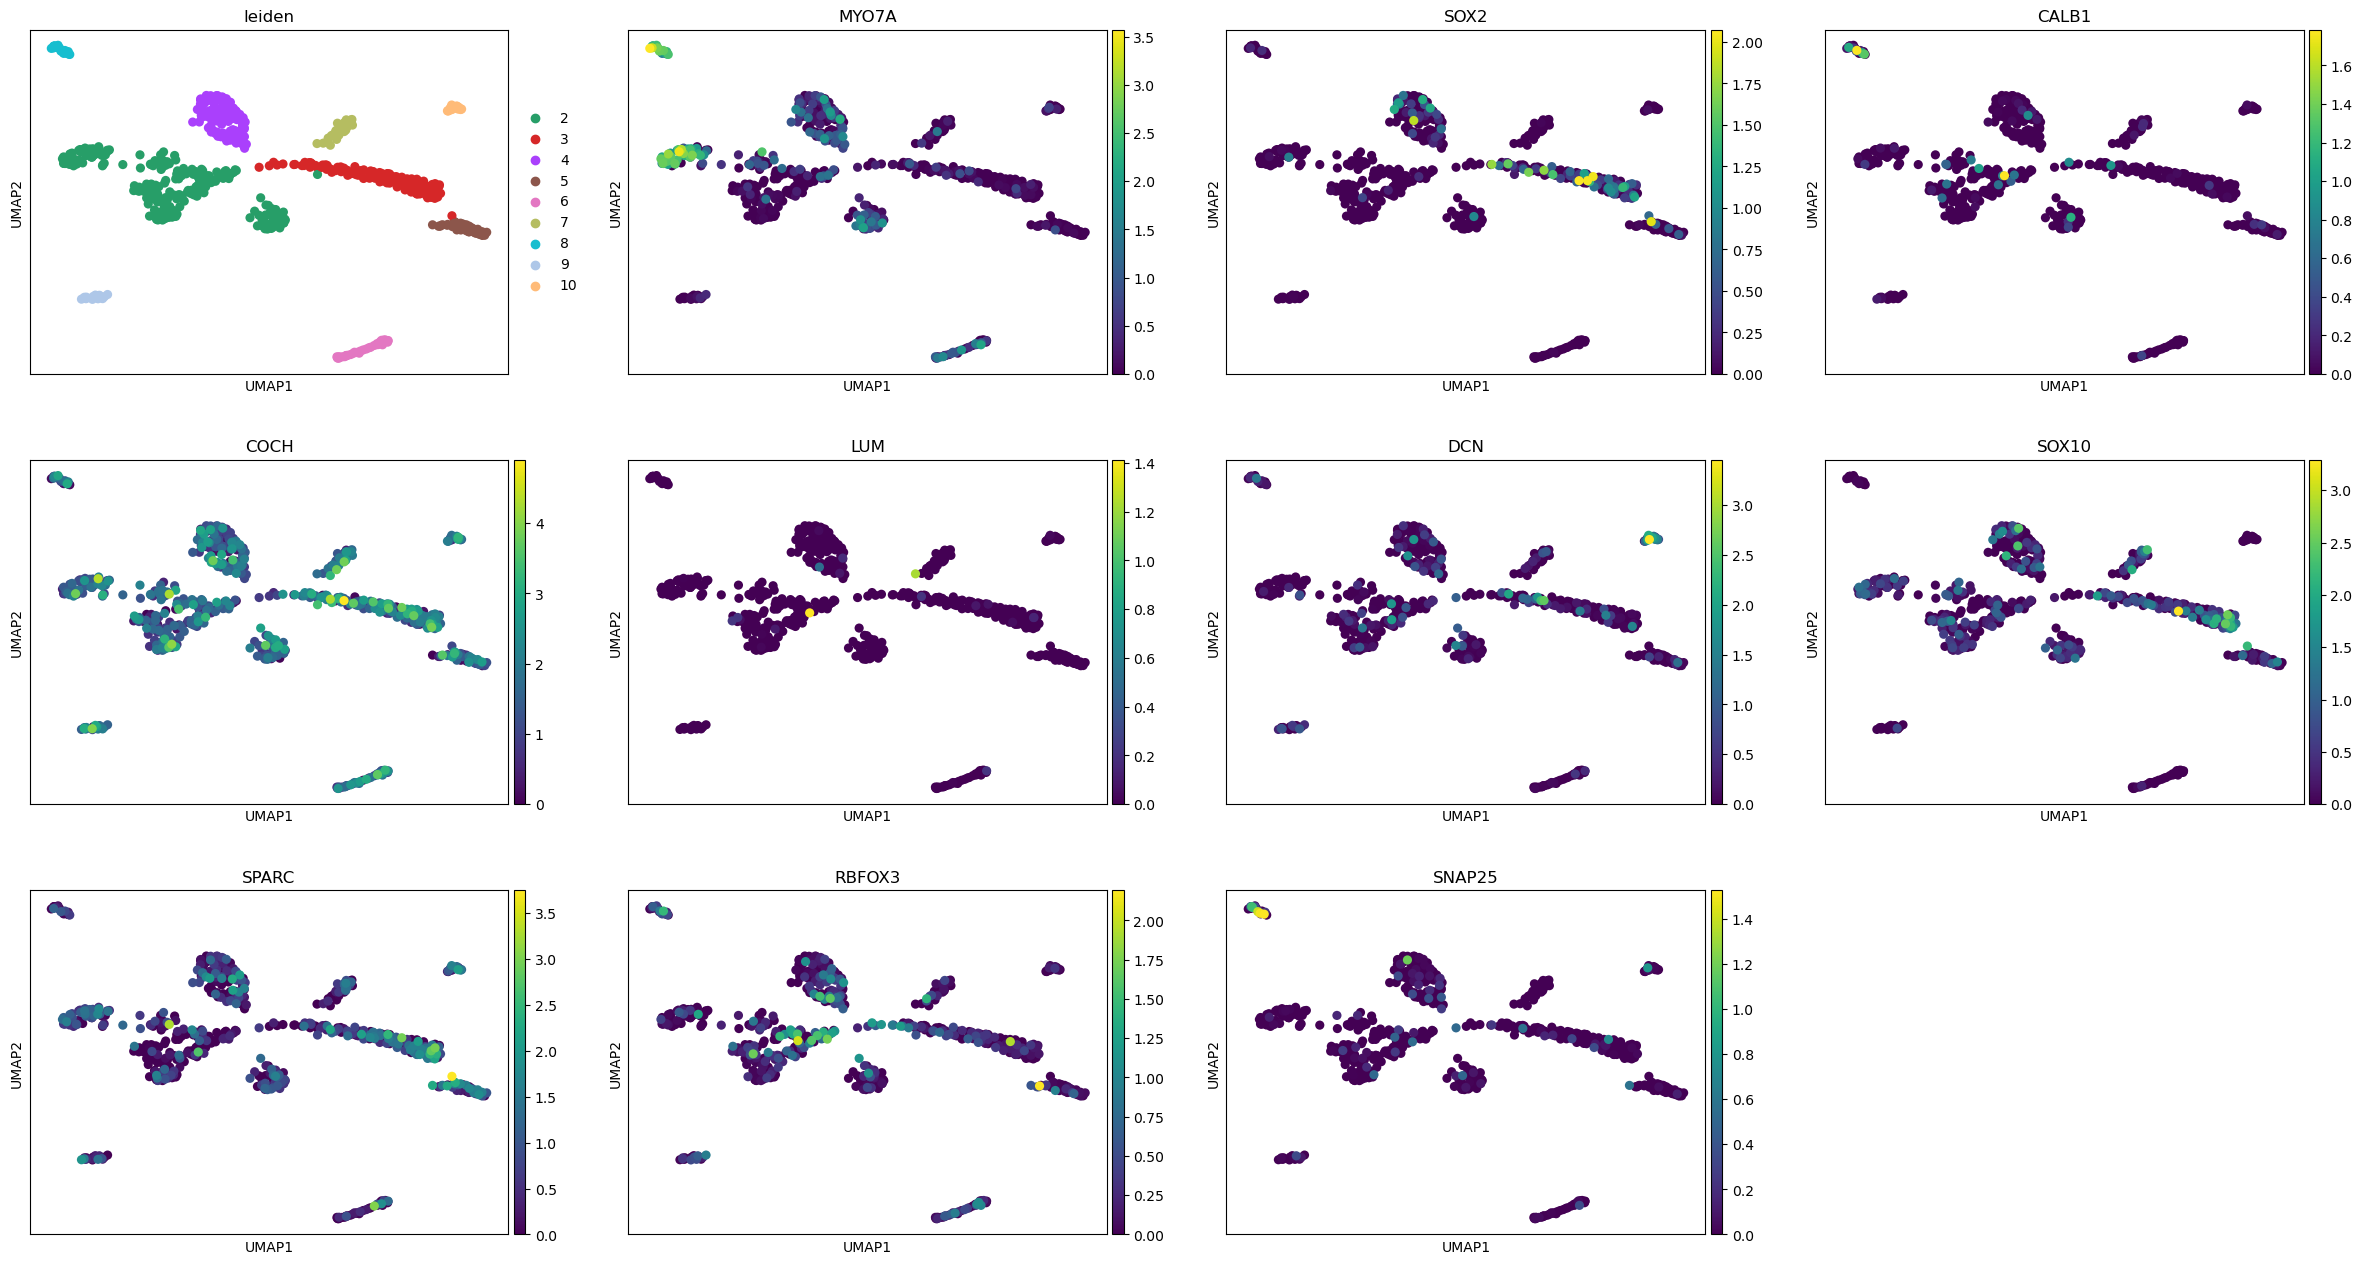

In [56]:
sc.pl.umap(subset_1,color=['leiden','MYO7A','SOX2','CALB1','COCH','LUM','DCN','SOX10','SPARC','RBFOX3','SNAP25'],layer='log1p')

In [68]:
subset_1.write_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/Subset/Subset_without_big_cluster.h5ad")

[Executed on 2023-11-27 16:36:28.373971]
